# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder 

In [2]:
%cd C:\Users\purvi\OneDrive\Documents\Projects by me\OASIS projects

C:\Users\purvi\OneDrive\Documents\Projects by me\OASIS projects


In [3]:
df = sns.load_dataset("Iris")

# Performing EDA

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
31,5.4,3.4,1.5,0.4,setosa
77,6.7,3.0,5.0,1.7,versicolor
114,5.8,2.8,5.1,2.4,virginica
49,5.0,3.3,1.4,0.2,setosa


In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.shape

(150, 5)

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df['species'],categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Visualisation

In [12]:
# Count the occurrences of each species
species_counts = df['species'].value_counts()
species_counts

species
0    50
1    50
2    50
Name: count, dtype: int64

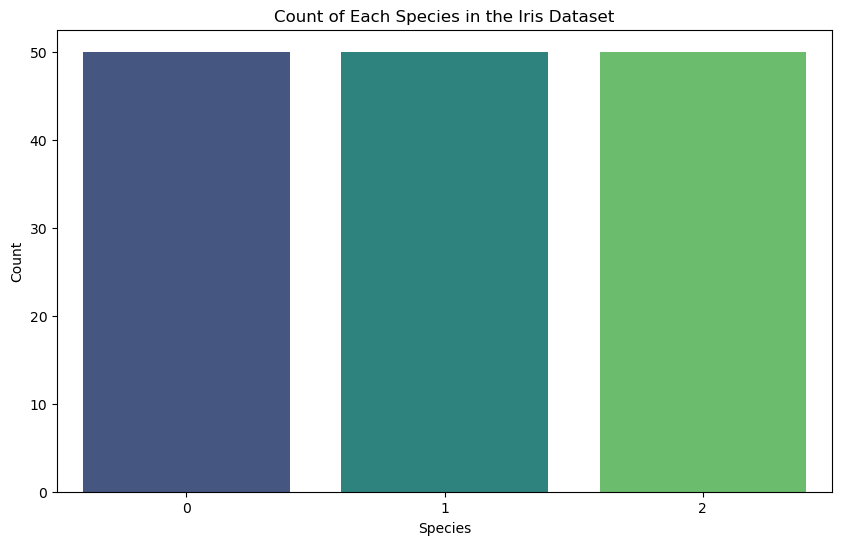

In [13]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=species_counts.index, y=species_counts.values, palette='viridis')
plt.title('Count of Each Species in the Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

INSIGHTS : 
Equal Distribution: Each species (Setosa, Versicolor, and Virginica) has an equal count of 50 samples, indicating a balanced dataset.

Dataset Suitability: The balanced nature of the dataset is suitable for training classification models, as it helps avoid bias towards any particular class.

C:\Users\purvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\purvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\purvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\purvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

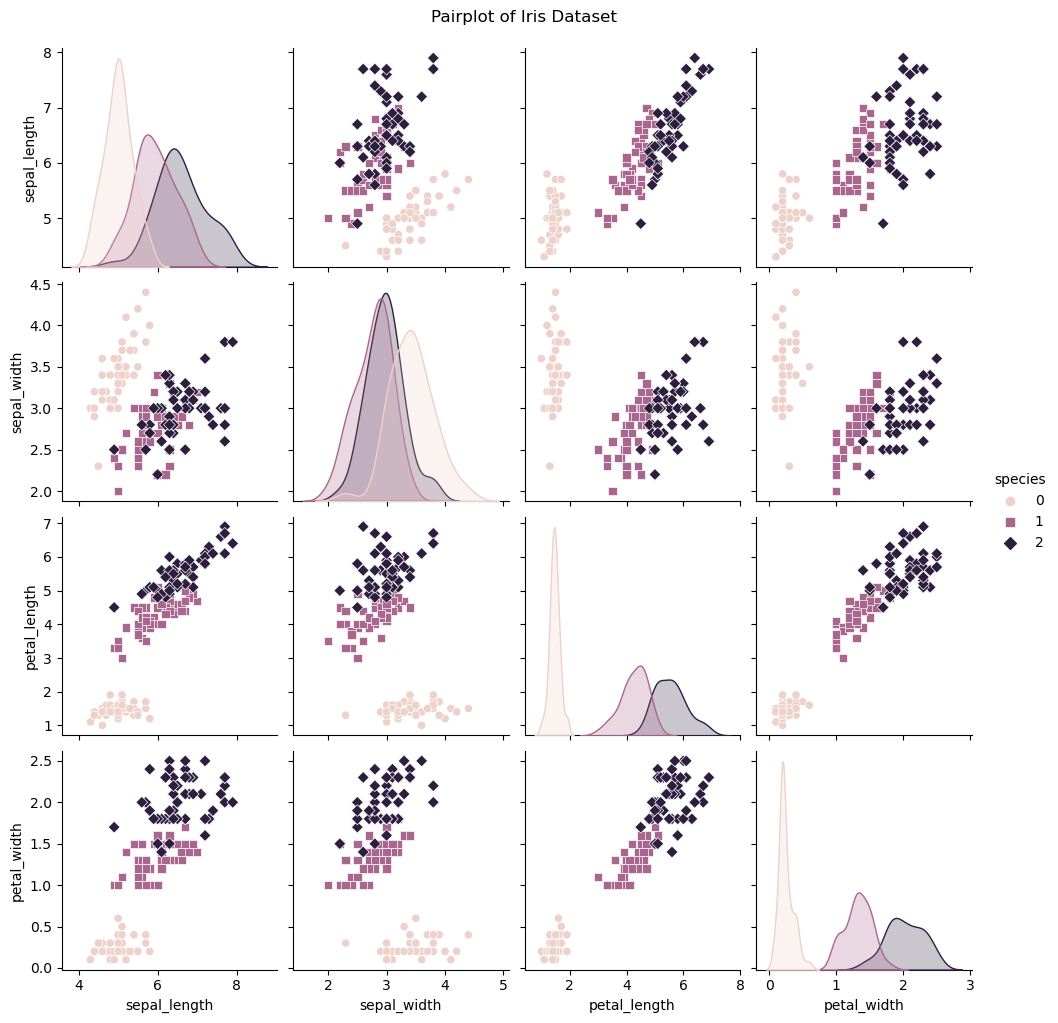

In [14]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

Different colors and markers are used to represent different species of the iris flower:

0 (light pink circles) for Setosa

1 (pink squares) for Versicolor

2 (dark purple diamonds) for Virginica

INSIGHTS : The pairplot reveals that Setosa is easily separable from Versicolor and Virginica, particularly using petal dimensions (length and width). Versicolor and Virginica show some overlap, indicating that distinguishing between them might require a combination of features or more sophisticated techniques. Petal dimensions are more effective for classification than sepal dimensions.

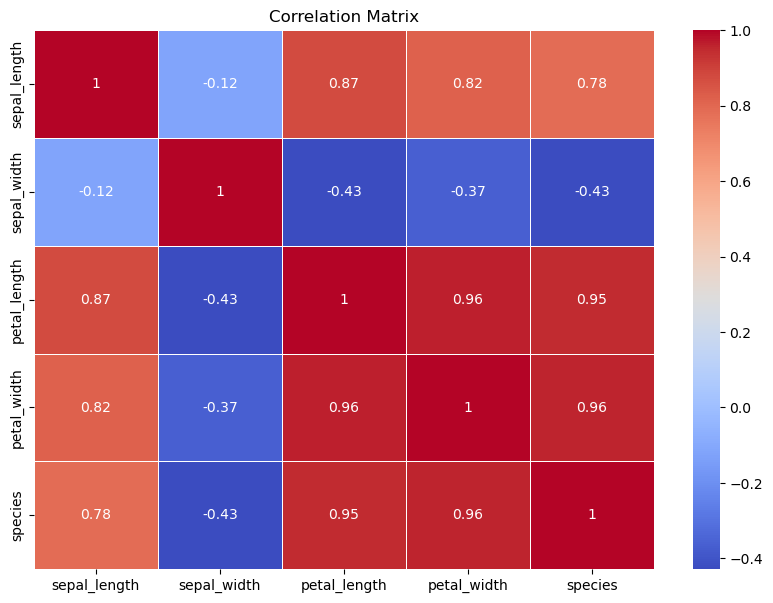

In [15]:
# Correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

INSIGHTS : The heatmap indicates that petal dimensions (length and width) are highly correlated with each other and with the species, making them strong predictors. Sepal width, on the other hand, has a weaker and negative correlation with petal dimensions.

## LABEL ENCODING THE TARGET

Since the algorithms accept only numeric data we will encode the 'Species' column using the LabelEncoder() from scikit learn.

In [16]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

## NORMALIZING FEATURES

Normalizing the features give better performance. Hence I have normalized all the features by scaling them to 0 mean and a unit standard deviation.

In [17]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('species',axis=1))
X=scaled_df
Y=df['species']

In [18]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Training and testing 

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

## Model Training and Evaluation

In [20]:
# Logistic Regression


clf_lr=LogisticRegression(C=10)
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [21]:
## K-nearest neighbour(KNN)

clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [22]:
## Linear Support Vector Machine(SVM)

SVM=SVC()
SVM.fit(x_train,y_train)
pred=SVM.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


## Comparing Different Algorithms

In [23]:
models=[LogisticRegression(),SVC(),KNeighborsClassifier()]
model_names=['LogisticRegression','LinearSVM','KNearestNeighbors']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [26]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,1.0
1,LinearSVM,1.0
2,KNearestNeighbors,1.0


C:\Users\purvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


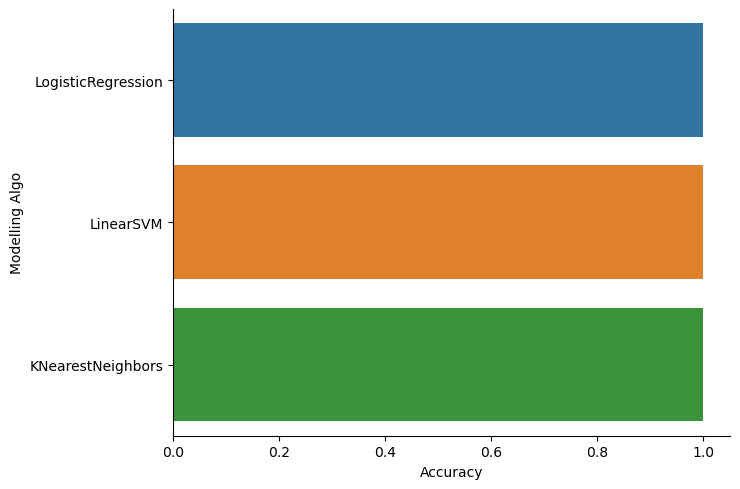

In [31]:
sns.catplot(data=acc_frame, y='Modelling Algo', x='Accuracy', kind='bar', height=5, aspect=1.5)
plt.show()